In [129]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
#Manually implemented Linear Regression, Gradient Descent, Cost Function

-Linear Regression:    $$f_{w,b}(x) = wx + b$$
-Cost Function: $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 
* The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$

In [131]:
def compute_cost(X, y, m, c):
    total_cost = 0
    N = float(len(y))
    for i in range(len(y)):
        total_cost += (y[i] - (m * X[i] + c)) ** 2
    return total_cost / N

In [132]:
def gradient_descent(X, y, m, c, learning_rate, num_iterations, batch_size):
    N = float(len(y))
    costs = []
    
    for iteration in range(num_iterations):
        indices = np.random.choice(len(y), batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        m_gradient = 0
        c_gradient = 0
        for i in range(batch_size):
            m_gradient += - (2/batch_size) * X_batch[i] * (y_batch[i] - (m * X_batch[i] + c))
            c_gradient += - (2/batch_size) * (y_batch[i] - (m * X_batch[i] + c))

        m = m - (learning_rate * m_gradient)
        c = c - (learning_rate * c_gradient)
        cost = compute_cost(X, y, m, c)
        costs.append(cost)
        # Check if cost is reducing
        if iteration > 1 and abs(costs[-2] - costs[-1]) < 1e-6:  # Adjust this threshold as needed
            print("Convergence achieved at iteration:", iteration)
            break

    return m, c, costs


In [133]:
def predict(X, m, c):
    return m * X + c

In [134]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [135]:
def r2_score(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    sse = np.sum((y_true - y_pred) ** 2)
    return 1 - (sse / sst)

In [136]:
data = pd.read_csv('city_temperature.csv', low_memory=False, usecols=['Year', 'AvgTemperature'])
filtered_data = data[(data['Year'] >= 1995) & (data['Year'] < 2020)]
clean_data = filtered_data.groupby('Year')['AvgTemperature'].mean().reset_index()

print(data.head())

   Year  AvgTemperature
0  1995            64.2
1  1995            49.4
2  1995            48.8
3  1995            46.4
4  1995            47.9


               Year  AvgTemperature
count  2.906327e+06    2.906327e+06
mean   2.006624e+03    5.600492e+01
std    2.338226e+01    3.212359e+01
min    2.000000e+02   -9.900000e+01
25%    2.001000e+03    4.580000e+01
50%    2.007000e+03    6.250000e+01
75%    2.013000e+03    7.550000e+01
max    2.020000e+03    1.100000e+02


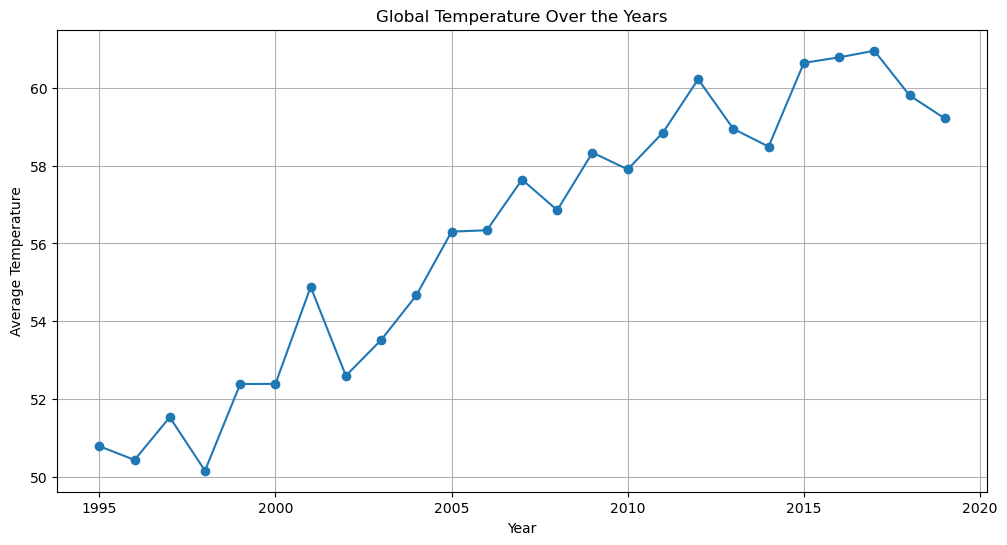

In [137]:
print(data.describe())

plt.figure(figsize=(12,6))
plt.plot(clean_data['Year'], clean_data['AvgTemperature'], marker='o')
plt.title('Global Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()


In [138]:
X = clean_data['Year'].values.reshape(-1,1)
y = clean_data['AvgTemperature'].values

# Manually split the dataset into 80% training and 20% testing
split_index = int(0.8 * len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [139]:
# Feature Scaling
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Initialize coefficients
m = 0  # Slope
c = 0  # Intercept

In [140]:
learning_rate = 0.01
num_iterations = 5000
batch_size = 10
m, c, costs = gradient_descent(X_train, y_train, m, c, learning_rate, num_iterations, batch_size)

Convergence achieved at iteration: 411


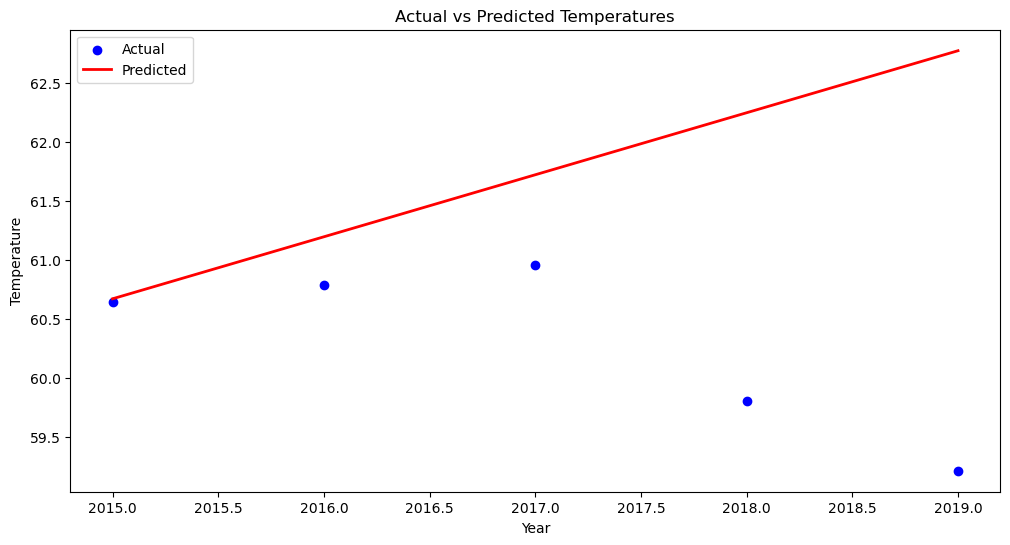

In [141]:
y_pred = predict(X_test, m, c)

plt.figure(figsize=(12,6))
plt.scatter(X_test * X_std + X_mean, y_test, color='blue', label='Actual')  # Rescaling the test years
plt.plot(X_test * X_std + X_mean, y_pred, color='red', linewidth=2, label='Predicted')  # Rescaling the test years
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [142]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 3.070770922087096
R^2 Score: -33.89087883027305


In [143]:
scaled_future_years = (future_years - X_mean) / X_std

future_years = np.array([[year] for year in range(2024, 2051)])
future_temps = predict(scaled_future_years, m, c)  # Using your predict function

predicted_data = pd.DataFrame({
    'Year': future_years.ravel(),
    'PredictedTemperature': future_temps.ravel()
})

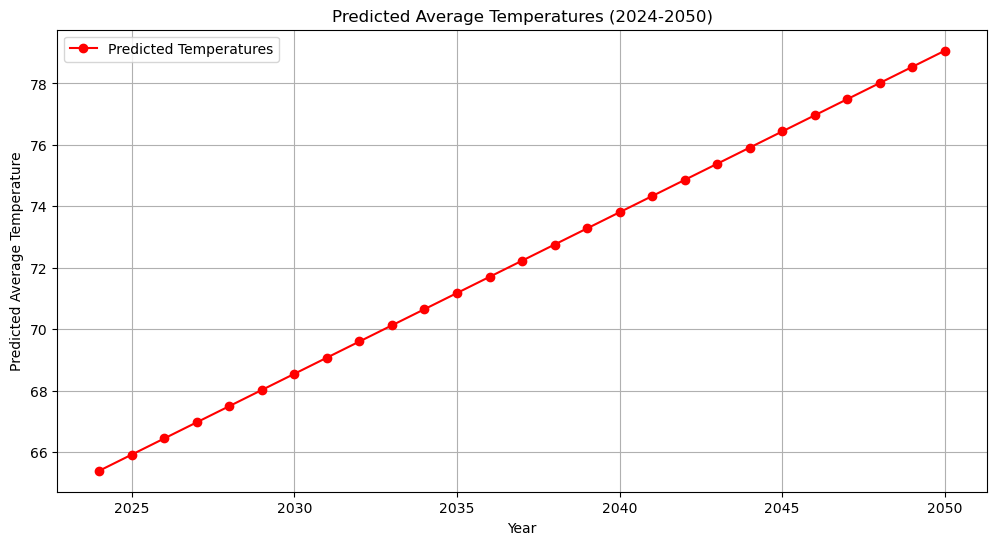

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(predicted_data['Year'], predicted_data['PredictedTemperature'], marker='o', 
         color='red', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Predicted Average Temperature')
plt.title('Predicted Average Temperatures (2024-2050)')
plt.grid(True)
plt.legend()
plt.show()